<a href="https://colab.research.google.com/github/elevien/phenotypic_variability_review/blob/main/growth_rate_variation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import optimize

In [2]:
def run_ou_process(gamma,gr0,Dgr,tmax,*,dt = 0.01):
    gr = [1]
    v = [1]
    t = [0]
    while t[-1] < tmax:
        gr_new = gr[-1]+gamma*(gr0-gr[-1])*dt + np.sqrt(dt*Dgr)*np.random.normal(0,1)
        gr.append(gr_new)
        v.append(v[-1]+v[-1]*gr[-1]*dt)
        if v[-1]>2+np.random.normal(0,0.2):
            v[-1] = v[-1]/2
        t.append(t[-1]+dt)
        
    return np.array(gr),np.array(v),np.array(t)

def run_constant_process(gamma,gr0,Dgr,tmax,*,dt = 0.01):
    gr = [1]
    v = [1]
    t = [0]
    while t[-1] < tmax:
        gr_new = gr[-1]
        gr.append(gr_new)
        v.append(v[-1]+v[-1]*gr[-1]*dt)
        if v[-1]>2+np.random.normal(0,0.2):
            v[-1] = v[-1]/2
            gr[-1] = gr0 + np.random.normal(0,0.2)
        t.append(t[-1]+dt)
        
    return np.array(gr),np.array(v),np.array(t)

In [3]:
gr_ou,v_ou,t_ou = run_ou_process(10,1,0.2,5)
gr_c,v_c,t_c = run_constant_process(1,1,0.2,5)

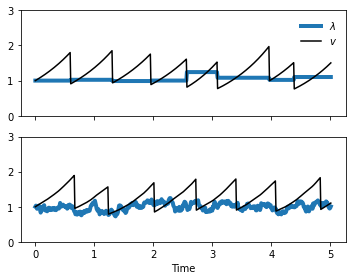

In [4]:
fig,axs = plt.subplots(nrows = 2,figsize=(5,4),sharex=True,sharey=True)
ax = axs[0]
ax.plot(t_c,gr_c,label=r'$\lambda$',linewidth=4)
ax.plot(t_c,v_c,'k-',label=r'$v$')
ax.legend(frameon=False)
ax.set_ylim([0,3])

ax = axs[1]
ax.plot(t_ou,gr_ou,linewidth=4)
ax.plot(t_ou,v_ou,'k-')
ax.set_xlabel('Time')
plt.tight_layout()